## Sample Example for Linear Regression

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree


Intercept = 50000.00000000012
Slope = 1999.9999999999995


Text(0.5, 1.0, 'Simple Example for Linear Regression')

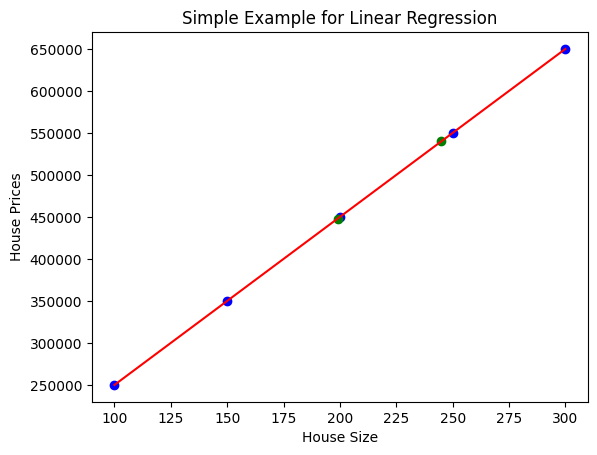

In [10]:
x = np.array([100,150,200,250,300]).reshape(-1,1) # Taking house Sizes in square feet

y = np.array([250000,350000,450000,550000,650000]) # Taking house prices in square feet

model = LinearRegression()
model.fit(x,y) # Dependent,Independent variables

new_house_size = np.array([245,199]).reshape(-1,1)
predicted_prices = model.predict(new_house_size)

print("Intercept =",model.intercept_)
print("Slope =",model.coef_[0])

plt.scatter(x,y,color='blue',label='Data')
plt.plot(x,model.predict(x),color='red',label="Regression Line")
plt.scatter(new_house_size,predicted_prices,color="Green",label="Predictions")
plt.xlabel('House Size')
plt.ylabel('House Prices')
plt.title("Simple Example for Linear Regression")


Mean squared error is:  3035.060115291269
Weights:  [941.43097333]
Intercept:  153.39713623331644


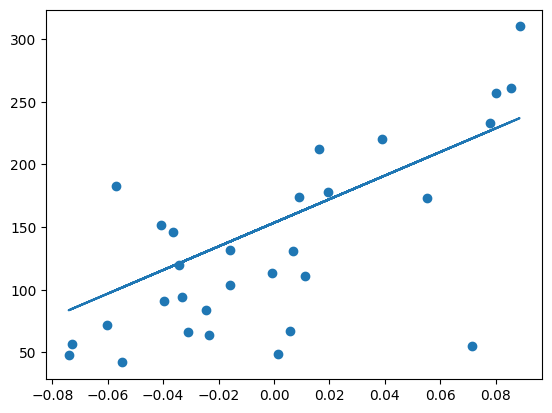

In [3]:
diabetes = datasets.load_diabetes() 

diabetes_x = diabetes.data[:, np.newaxis, 2]    


diabetes_x_train = diabetes_x[:-30]
diabetes_x_test = diabetes_x[-30:]

diabetes_y_train = diabetes.target[:-30]
diabetes_y_test = diabetes.target[-30:]


model = LinearRegression()

model.fit(diabetes_x_train, diabetes_y_train)
diabetes_y_predict = model.predict(diabetes_x_test)

print("Mean squared error is: ", mean_squared_error(diabetes_y_test, diabetes_y_predict))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)

plt.scatter(diabetes_x_test, diabetes_y_test)
plt.plot(diabetes_x_test, diabetes_y_predict)
plt.show()

## Classification

In [4]:
iris = datasets.load_iris()

features = iris.data
labels = iris.target


# Training the classifier 
clf = KNeighborsClassifier()
clf.fit(features,labels)

pred = clf.predict([[4.56,1.45,1.45,5.4]])
print(pred)


[1]


MAE : 9.0, MSE : 83.25, R2 : -2.33
Predicted Score : 83.83333333333334


d:\python\MachineLearning\Learn Scitkit 1\env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


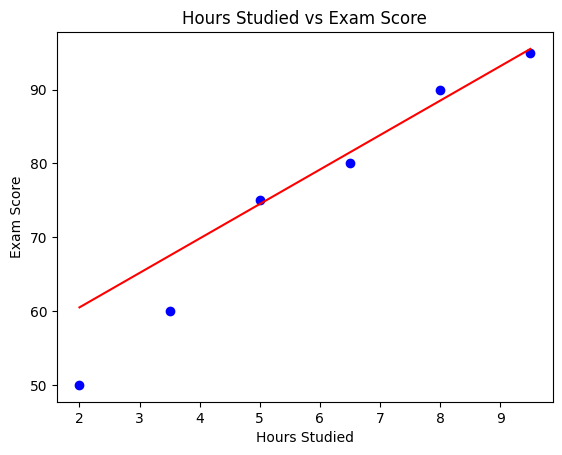

In [5]:
data = pd.DataFrame({
    'Hours Studied' : [2,3.5,5,6.5,8,9.5],
    "Exam Score" : [50,60,75,80,90,95]
})

x = data[['Hours Studied']]
y = data['Exam Score']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # Random state is seed value for Equal division

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'MAE : {mae}, MSE : {mse}, R2 : {r2}')

new_data = [[7]]    

predicted_sc = model.predict(new_data)
print(f'Predicted Score : {predicted_sc[0]}')

plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red')
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.title("Hours Studied vs Exam Score")
plt.show()


## Logistic Regression

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

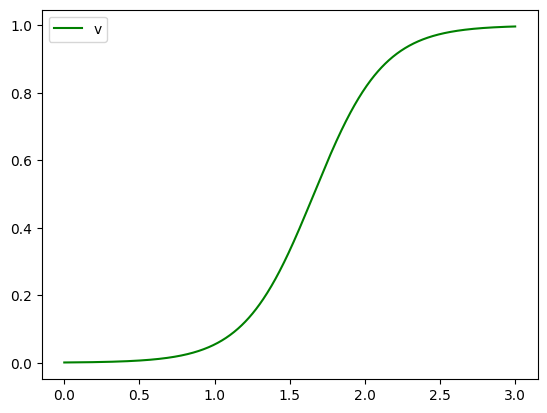

In [12]:
# Train Logistic Regression classifier to predict whether flower is iris virginica or not

iris = datasets.load_iris()

# print(list(iris.keys()))

print(iris["DESCR"])

# Using only one feature 

x = iris["data"][:,3:] #Another method to convert the array into the 2-D format
y = (iris["target"] == 2).astype(np.int32)
print(x,y)
clf = LogisticRegression()
clf.fit(x,y)

pred = clf.predict([[0.2]])

print(pred)

# Plotting using matplotlib
x_new = np.linspace(0,3,1000).reshape(-1,1) #creates 2-D array where many rows in single column while (1,-1) creates 2-D array which contains single Row and many columns
y_prob = clf.predict_proba(x_new)

arr = np.array([1 if x > 0.5 else 0 for x in y_prob[:,1]])
print(arr)
plt.plot(x_new,y_prob[:,1], "g-")
plt.legend("verginica")

plt.show()



In [13]:
data = pd.read_csv("titanic.csv")


data["Age"] = data["Age"].fillna(data["Age"].mean())
data["Fare"] = data["Fare"].fillna(data["Fare"].mean())


data = data.drop(["PassengerId","Name","Sex","Cabin","Ticket","Embarked"],axis=1)

x = data.drop(["Survived"],axis=1)
y = data["Survived"]
print(x,y)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42) # Random state is seed value for Equal division

model = LogisticRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy = {accuracy}")


conf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion mat : {conf_matrix}")

class_rep = classification_report(y_test,y_pred)

print(class_rep)



     Pclass       Age  SibSp  Parch      Fare
0         3  34.50000      0      0    7.8292
1         3  47.00000      1      0    7.0000
2         2  62.00000      0      0    9.6875
3         3  27.00000      0      0    8.6625
4         3  22.00000      1      1   12.2875
..      ...       ...    ...    ...       ...
413       3  30.27259      0      0    8.0500
414       1  39.00000      0      0  108.9000
415       3  38.50000      0      0    7.2500
416       3  30.27259      0      0    8.0500
417       3  30.27259      1      1   22.3583

[418 rows x 5 columns] 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64
Accuracy = 0.6190476190476191
Confusion mat : [[48  2]
 [30  4]]
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        50
           1       0.67      0.12      0.20        34

    accuracy                           0.62        84


## Decision Tree

In [3]:
data = {'A' : [1,1,2,2], 'B' : [2,1,2,3], 'C' : [1,2,2,1], 'Y' : ['No','No','Yes','Yes']}
df = pd.DataFrame(data)

# Features and Target
X = df[['A','B','C']]
Y = df['Y']

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42) # Random state is seed value for Equal division

model = DecisionTreeClassifier()
model.fit(X,Y)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy = {accuracy}")


conf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion mat : {conf_matrix}")

class_rep = classification_report(y_test,y_pred)
class_rep
# Answer is getting 1 beacuase model is overfitted on the training dataset.

Accuracy = 1.0
Confusion mat : [[1]]


d:\python\MachineLearning\Learn Scitkit 1\env\Lib\site-packages\sklearn\metrics\_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


'              precision    recall  f1-score   support\n\n          No       1.00      1.00      1.00         1\n\n    accuracy                           1.00         1\n   macro avg       1.00      1.00      1.00         1\nweighted avg       1.00      1.00      1.00         1\n'

In [15]:
data = datasets.load_iris()

X = data.data
Y = data.target

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42) # Random state is seed 

tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(x_train,y_train)

y_train_pred = tree_clf.predict(x_train)
y_test_pred = tree_clf.predict(x_test)

train_acc = accuracy_score(y_train,y_train_pred)
test_acc = accuracy_score(y_test,y_test_pred)

print(f"Train Accuray : {train_acc:.2f} \nTest Accuracy : {test_acc:.2f}")



Train Accuray : 1.00 
Test Accuracy : 1.00


[Text(0.3076923076923077, 0.9285714285714286, 'petal length (cm) <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width (cm) <= 1.6\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width (cm) <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]\nclass = virginica'

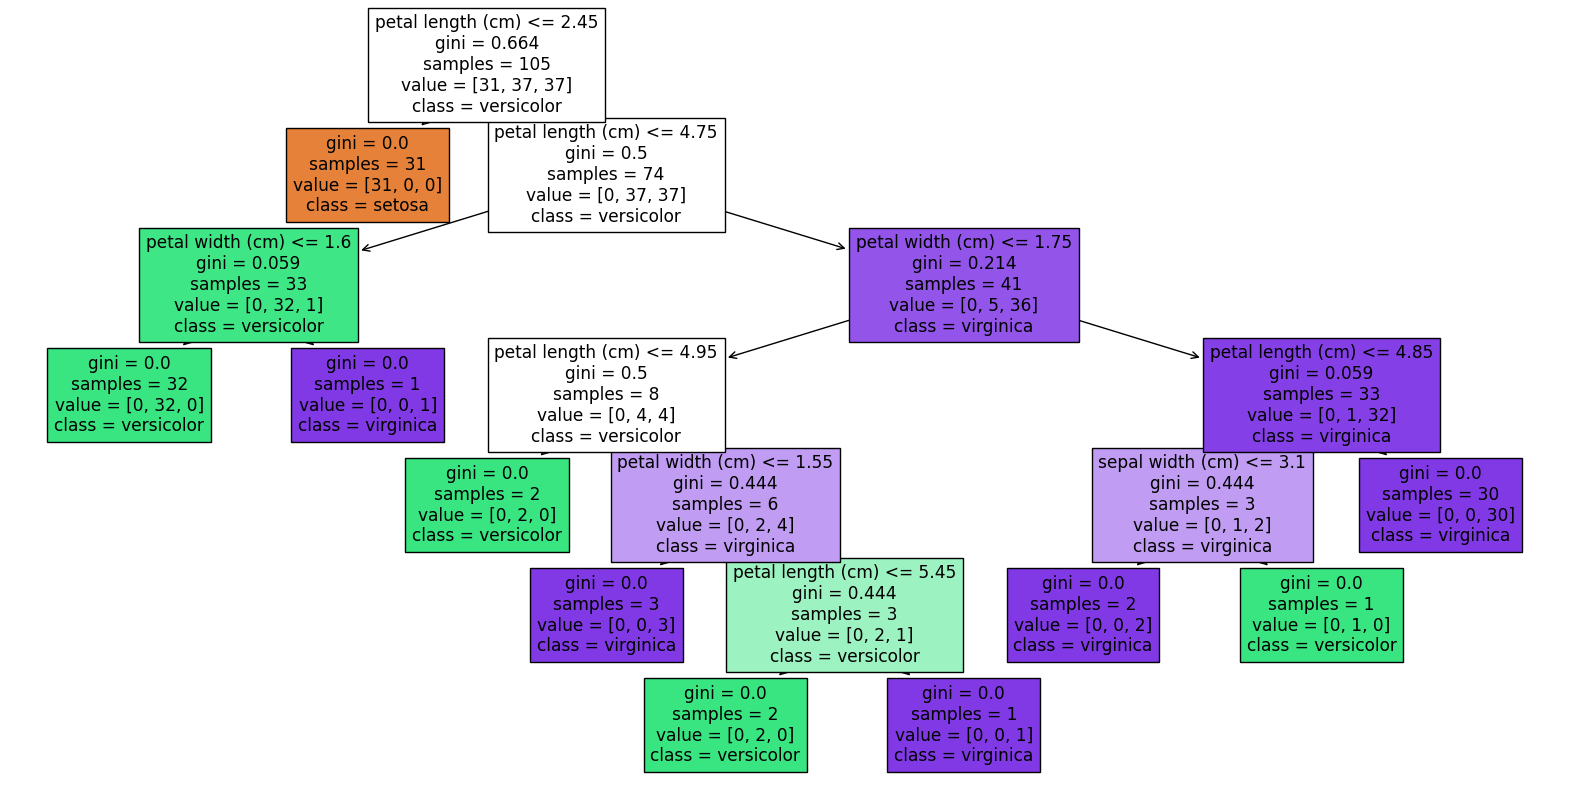

In [16]:
# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))

plot_tree(tree_clf, filled=True,feature_names=data.feature_names,class_names=data.target_names)

Train Accuray : 0.65 
Test Accuracy : 0.71


[Text(0.5, 0.75, 'petal length (cm) <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]\nclass = versicolor'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.5\nsamples = 74\nvalue = [0, 37, 37]\nclass = versicolor'),
 Text(0.625, 0.5, '  False')]

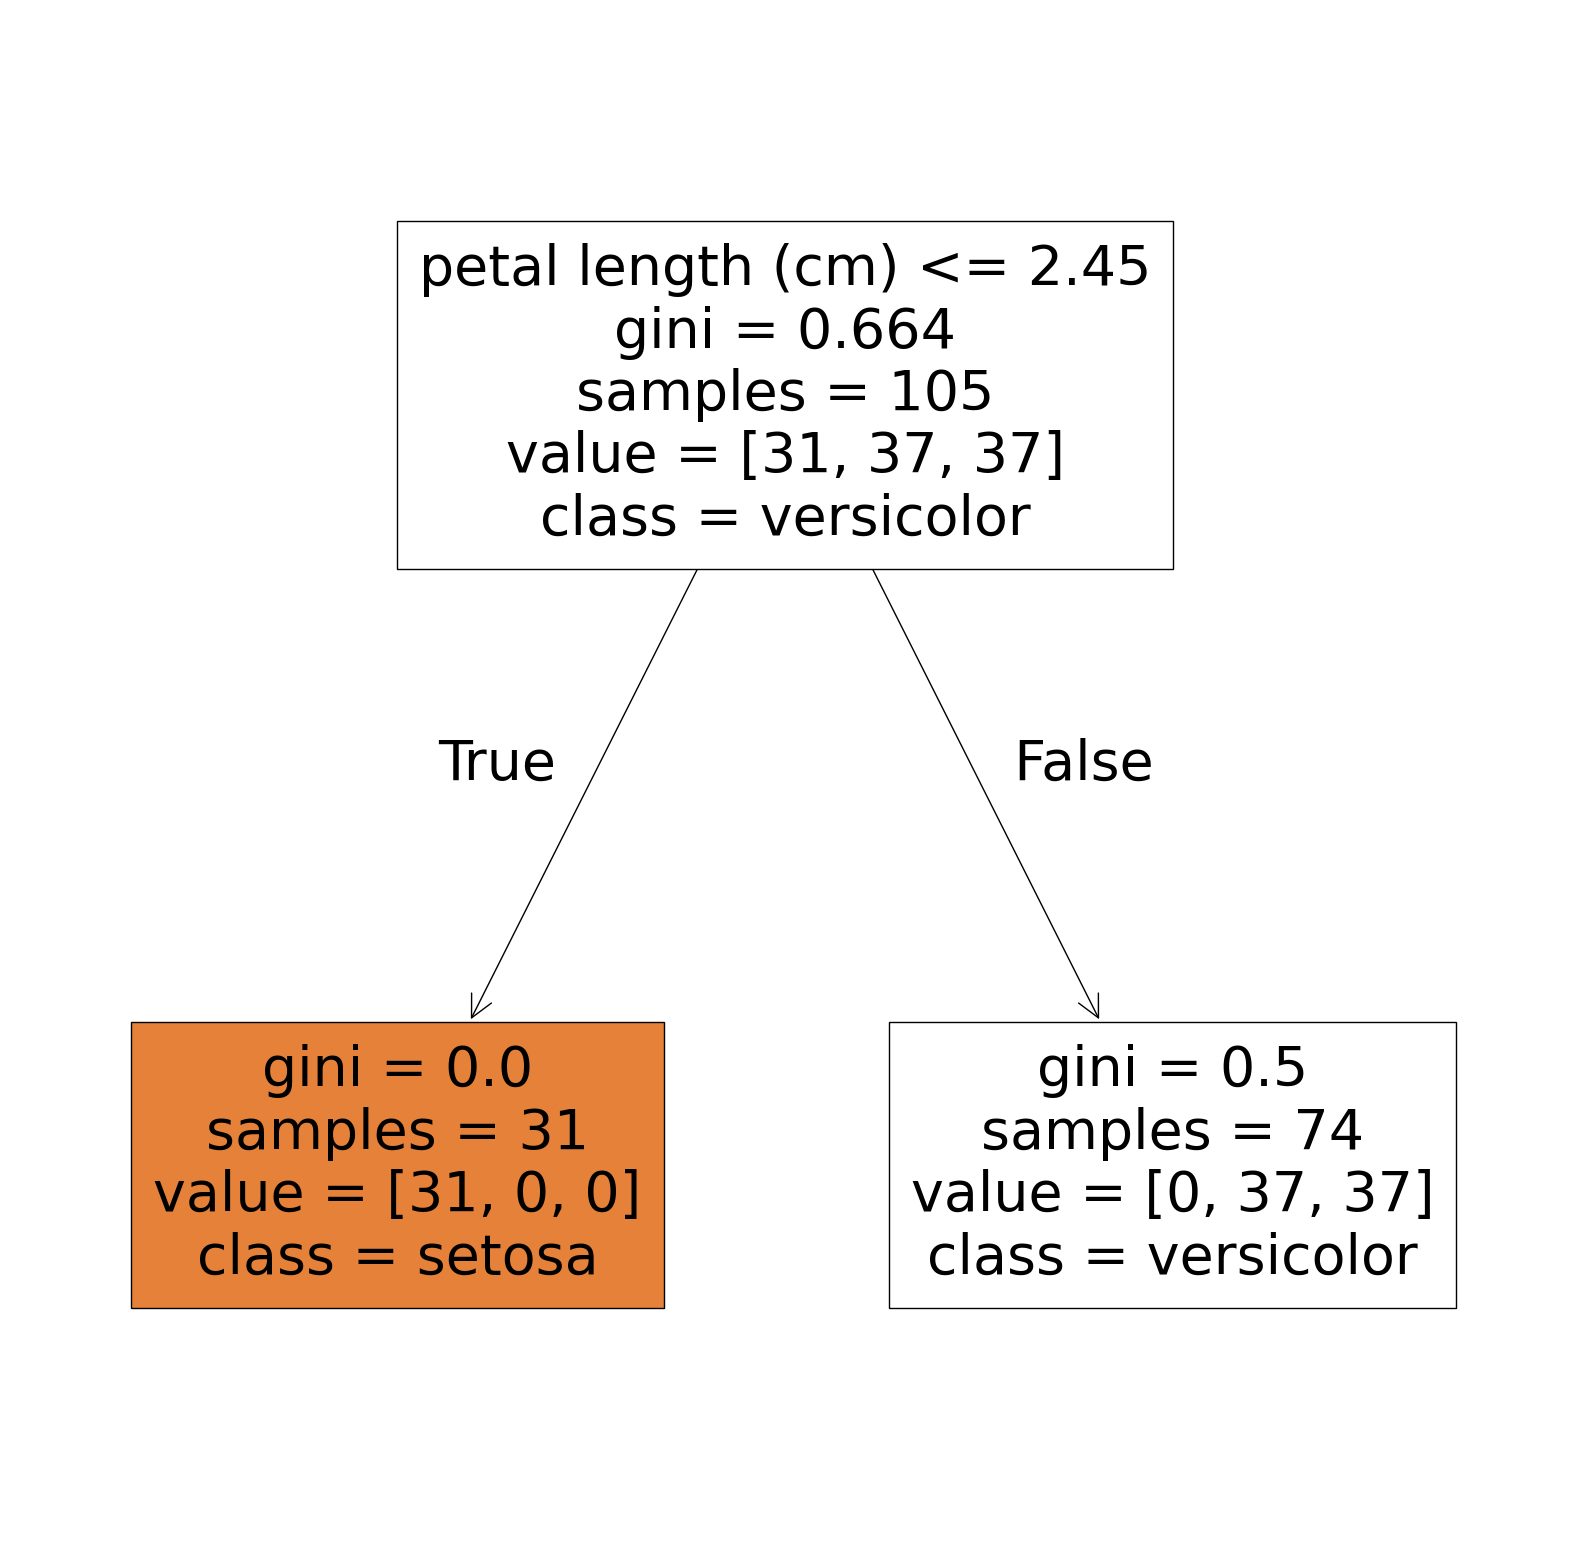

In [22]:
# After pruning

pruned_clf_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
pruned_clf_tree.fit(x_train,y_train)

y_train_pred_pru = pruned_clf_tree.predict(x_train)
y_test_pred_pru = pruned_clf_tree.predict(x_test)

train_acc = accuracy_score(y_train,y_train_pred_pru)
test_acc = accuracy_score(y_test,y_test_pred_pru)
    
print(f"Train Accuray : {train_acc:.2f} \nTest Accuracy : {test_acc:.2f}")

# Visualization
plt.figure(figsize=(20,20))

plot_tree(pruned_clf_tree, filled=True,feature_names=data.feature_names,class_names=data.target_names)